In [4]:
import sys
from pyprojroot import here
sys.path.insert(0, str(here()))

here we expect a identity result, using CNOT as the var_gate

1. would this gate lead to the same result as the identity gate when using SWAP ob?

=> No, after testing we could find the output would be 1/2, which is independent of t.

# Gate eigen-decoposition

In [1]:
%matplotlib inline
import numpy as np
import sympy as sp
from sympy import sqrt, symbols, pi, cos, Matrix, latex, trace
from IPython.display import display, Math


CNOT = np.array([[1, 0, 0, 0],
                 [0, 1, 0, 0],
                 [0, 0, 0, 1],
                 [0, 0, 1, 0]])

eigenvalues, eigenvectors = np.linalg.eig(CNOT)

print("Eigenvalues:\n", eigenvalues)
print("Eigenvectors:\n", eigenvectors)

P = eigenvectors
D = np.diag(eigenvalues)
P_inv = np.linalg.inv(P)

print("P matrix:\n", P)
print("D matrix:\n", D)
print("P_inv matrix:\n", P_inv)

Eigenvalues:
 [ 1. -1.  1.  1.]
Eigenvectors:
 [[ 0.          0.          1.          0.        ]
 [ 0.          0.          0.          1.        ]
 [ 0.70710678 -0.70710678  0.          0.        ]
 [ 0.70710678  0.70710678  0.          0.        ]]
P matrix:
 [[ 0.          0.          1.          0.        ]
 [ 0.          0.          0.          1.        ]
 [ 0.70710678 -0.70710678  0.          0.        ]
 [ 0.70710678  0.70710678  0.          0.        ]]
D matrix:
 [[ 1.  0.  0.  0.]
 [ 0. -1.  0.  0.]
 [ 0.  0.  1.  0.]
 [ 0.  0.  0.  1.]]
P_inv matrix:
 [[ 0.          0.          0.70710678  0.70710678]
 [ 0.          0.         -0.70710678  0.70710678]
 [ 1.          0.          0.          0.        ]
 [ 0.          1.          0.          0.        ]]


# Circuit Form U(θ)

In [2]:
# 定义符号变量
theta = sp.Symbol('theta', real=True)

# 定义矩阵D
D = sp.diag(1, sp.exp(sp.I*sp.pi*sp.cos(theta)**2), 1, 1)

display(Math(latex(D)))

U =  P * D * P_inv
U.simplify()

print("U(θ):")
display(Math(latex(U)))

<IPython.core.display.Math object>

U(θ):


<IPython.core.display.Math object>

As the Z msmt result of input 00 and 11 are related to the front two columns of the matrix, we could easily found outputs of them are 1 and -1, respectively. Both of them are independent of θ.

# O_tilde

In [12]:
from Utils import SWAP

Ob = Matrix(SWAP)

print("Observable matrix:")
display(Ob)

# 计算U(a)^\dagger O U(a)
U_dagger = U.H
O_tilde = U_dagger @ Ob @ U
O_tilde.simplify()

print("U:")
display(Math(latex(U)))
print("U(a)^\dagger:")
display(Math(latex(U_dagger)))
# print("U(a)^\dagger @ Ob:")
# display(Math(latex(U_dagger@Ob)))
print("O_tilde:")
display(Math(latex(O_tilde)))

Observable matrix:


Matrix([
[1, 0, 0, 0],
[0, 0, 1, 0],
[0, 1, 0, 0],
[0, 0, 0, 1]])

U:


<IPython.core.display.Math object>

U(a)^\dagger:


<IPython.core.display.Math object>

O_tilde:


<IPython.core.display.Math object>

# PO and SG

In [31]:
from Symmetries.WernerSysSwapSymmetry import WernerSysSwapSymmetry
symmetry = WernerSysSwapSymmetry(1)

#TODO: yes, could add a custom symmetry here

PO = symmetry._twirling(np.array(O_tilde))
PO = Matrix(np.array(PO))
PO.simplify()
display(Math(latex(PO)))

<IPython.core.display.Math object>

In [32]:
# 计算 PO 和 O_tilde 之间的差
diff_matrix = PO - O_tilde

# 计算 H-S norm
# HS_norm = sqrt(sum([abs(elem)**2 for elem in diff_matrix]))
# HS_norm = sqrt(trace(diff_matrix.H * diff_matrix))
HS_norm = trace(diff_matrix.H * diff_matrix)

# 简化表达式
HS_norm = HS_norm.simplify()

print("HS_norm:")
display(Math(latex(HS_norm)))

HS_norm:


<IPython.core.display.Math object>

we could see that, for all kinds of possible circuit parameter settings, twirling operation would make the prediction better or worse or keeps.

Then its hard to tell what would twirling do to the circuit.

# SG Plot

output on 00 and 11 would always be constant values as stated below, here we plot the SG relative to $\theta$

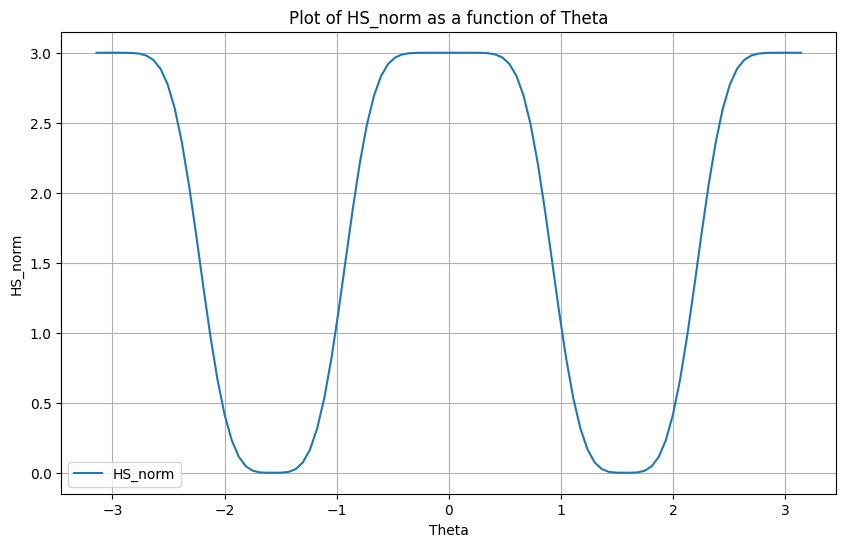

In [33]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

ticks = np.linspace(-np.pi, np.pi, 9) 
tick_labels = [r'$-\pi$', r'$-\frac{3\pi}{4}$', r'$-\frac{\pi}{2}$', r'$-\frac{\pi}{4}$', 0, r'$\frac{\pi}{4}$', r'$\frac{\pi}{2}$', r'$\frac{3\pi}{4}$', r'$\pi$']

theta_samples = np.linspace(-np.pi, np.pi, 100)
y_sg_func = sp.lambdify(theta, HS_norm, 'numpy')
y_sg_values = y_sg_func(theta_samples)

plt.figure(figsize=(10, 6))
plt.plot(theta_samples, y_sg_values, label='HS_norm')
plt.xlabel('Theta')
plt.ylabel('HS_norm')
plt.title('Plot of HS_norm as a function of Theta')
plt.legend()
plt.grid(True)
plt.show()

In [35]:
y_sg_func(np.pi/2)

0.0

Note: Though seems no wrong, but this seems would be too simple, but if we use two gates still, would there be the same final result?

# Output forms of selected samples

seems that: We already know that SG would lead to the optimal point, then if samples would change the training result, we would say SG has improvement.

But: #TODO: won't these be a little deliberate? would these gates be implemented by normal quantum operations?

In [45]:
from Utils import bellState

# samples (we know that t>=0 are valid states and t>=2/3 are separable states)
t_samples = np.linspace(0, 1, 5)

t = symbols('t')

phi_minus = Matrix(bellState('phi_minus'))
dm_phiMinus = t/4 * sp.eye(4) + (1-t) * (phi_minus * phi_minus.H)
# dm_g = (2-t)/6 * sp.eye(4) + (2*t-1)/6 * Matrix(SWAP)

for t in t_samples:
    print("t = ", t)
    dm_phiMinus_t = dm_phiMinus.subs('t', t)
    ew = trace(dm_phiMinus_t @ O_tilde)
    ew.simplify()
    ew = sp.nsimplify(ew)
    print("ew:")
    display(Math(latex(ew)))
    print("------------------------------------------------------")

t =  0.0
ew:


<IPython.core.display.Math object>

------------------------------------------------------
t =  0.25
ew:


<IPython.core.display.Math object>

------------------------------------------------------
t =  0.5
ew:


<IPython.core.display.Math object>

------------------------------------------------------
t =  0.75
ew:


<IPython.core.display.Math object>

------------------------------------------------------
t =  1.0
ew:


<IPython.core.display.Math object>

------------------------------------------------------


# loss function and label strategy

1. cc loss for each input

## square loss

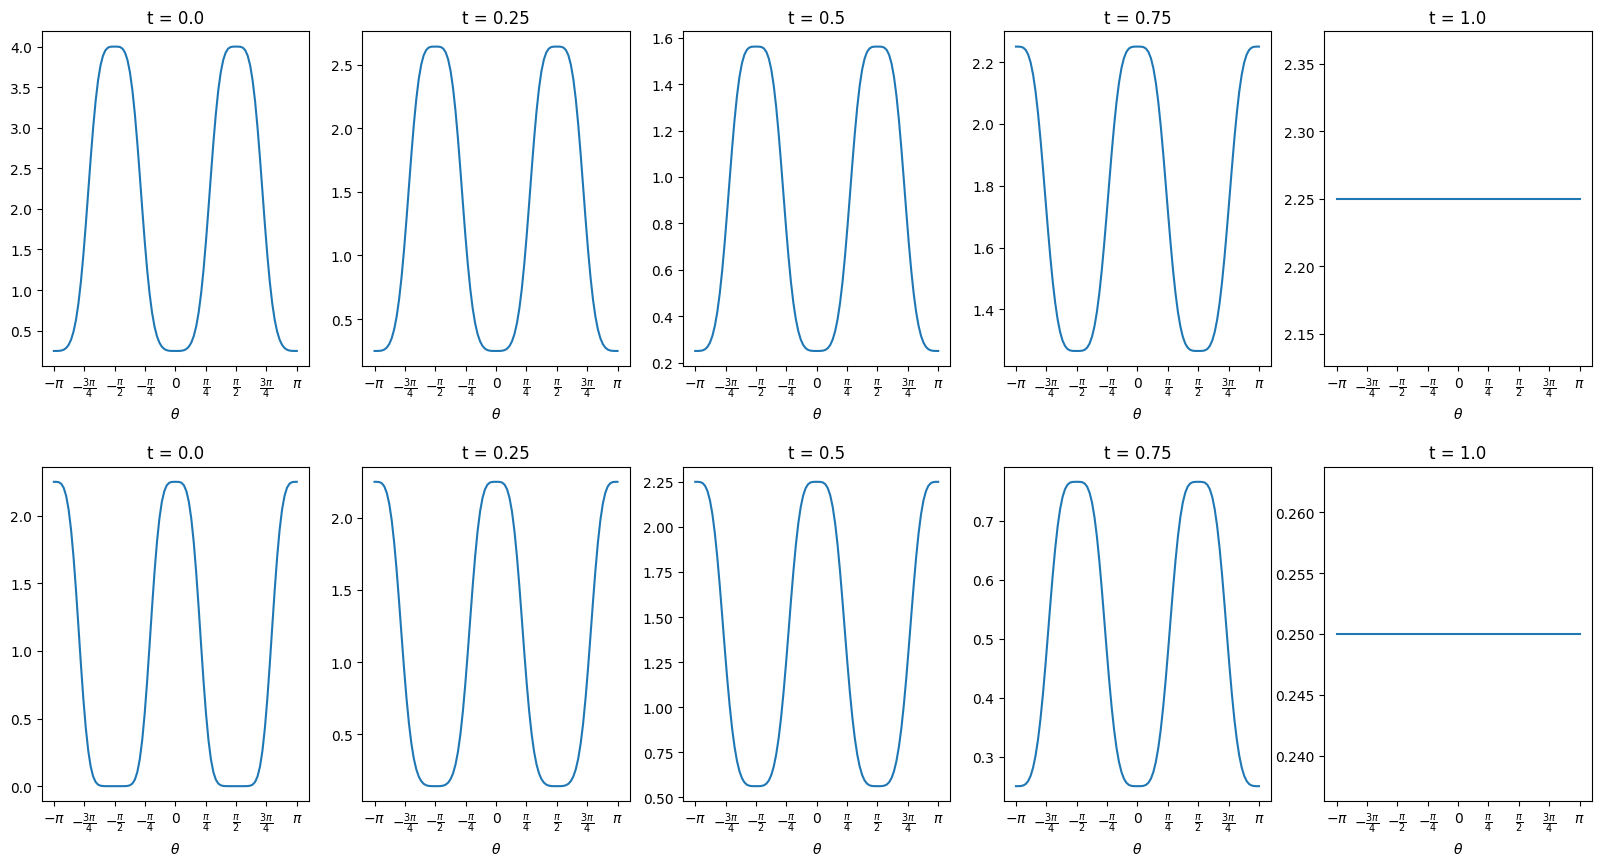

In [52]:
zLabels = [[1, 1, 1, -1, -1], [-1, -1, -1, 1, 1]] # entangled as 1 | entangled as -1

theta_samples = np.linspace(-np.pi, np.pi, 100)

fig, axs = plt.subplots(2, 5, figsize=(20, 10))

for zIdx, zLabel in enumerate(zLabels):
    for i in range(5):
        #* trace result
        dm_phiMinus_t = dm_phiMinus.subs('t', t_samples[i])
        ew_t = trace(dm_phiMinus_t @ O_tilde)
        ew_t.simplify()
        ew_t = sp.nsimplify(ew_t)

        #* loss form and samples
        y_square_loss = (ew_t - zLabel[i])**2
        y_square_loss_func = sp.lambdify(theta, y_square_loss, 'numpy')
        # y_square_loss_values = y_square_loss_func(theta_samples)
        y_square_loss_func_vectorized = np.vectorize(y_square_loss_func)
        y_square_loss_values = np.abs(y_square_loss_func_vectorized(theta_samples))

        axs[zIdx, i].set_title(f"t = {t_samples[i]}")
        axs[zIdx, i].plot(theta_samples, y_square_loss_values)
        axs[zIdx, i].set_xlabel(r'$\theta$')
        axs[zIdx, i].set_xticks(ticks)
        axs[zIdx, i].set_xticklabels(tick_labels)
    
plt.subplots_adjust(hspace=0.3)
plt.show()

we could see that these are still influenced by label strategy, so we may need to use more complex circuits, such as the one we used before